In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_hdf('../../data/gaia/common_kinematics.h5', key='star')
df.head()

,Etot,JR,Jphi,Jz,KE,Lx,Ly,Lz,vr,vz,vphi,XGC,YGC,ZGC,source_id
3,-129912.710271,19.527907,-1844.018219,0.076847,32705.927249,9.274515,-12.791122,-1844.018219,8.476661,-1.693553,-256.241785,-7219.449357,-420.686609,-33.227604,5937218444729627264
12,-116129.521791,87.863208,-2283.632715,14.659312,38137.430567,-83.855119,279.532118,-2283.632715,33.966056,34.031080,-272.654733,-8352.797747,848.660485,410.378436,2264885552539485440
15,-133164.824427,25.303868,-1723.066234,0.474291,22849.968422,-23.725259,11.017816,-1723.066234,-34.956364,0.887379,-211.039454,-8169.068872,170.773151,113.601360,2268718484434583680
21,-125166.583355,6.877512,-2025.107026,4.045564,29599.360122,-80.059162,48.521084,-2025.107026,-3.389265,5.414186,-243.848812,-8311.420701,581.192953,340.996475,2269473745842498816
22,-135563.330455,27.848565,-1621.707861,10.124721,19698.120953,-62.648255,-244.300844,-1621.707861,2.398367,-30.011521,-195.754206,-8258.125023,411.347381,257.249481,2269599601268930304


In [4]:
radius = 10000
df = df.loc[(df['XGC']-(-8200))**2 + df['YGC']**2 + df['ZGC']**2 < radius**2]
df.to_hdf('../../data/gaia/common_kinematics_10kpc.h5', key='star')

HDF5ExtError: HDF5 error back trace

  File "H5F.c", line 620, in H5Fopen
    unable to open file
  File "H5VLcallback.c", line 3501, in H5VL_file_open
    failed to iterate over available VOL connector plugins
  File "H5PLpath.c", line 578, in H5PL__path_table_iterate
    can't iterate over plugins in plugin path '(null)'
  File "H5PLpath.c", line 620, in H5PL__path_table_iterate_process_path
    can't open directory: /usr/local/hdf5/lib/plugin
  File "H5VLcallback.c", line 3351, in H5VL__file_open
    open failed
  File "H5VLnative_file.c", line 97, in H5VL__native_file_open
    unable to open file
  File "H5Fint.c", line 1999, in H5F_open
    unable to read root group
  File "H5Groot.c", line 228, in H5G_mkroot
    can't check if symbol table message exists
  File "H5Omessage.c", line 845, in H5O_msg_exists
    unable to protect object header
  File "H5Oint.c", line 1051, in H5O_protect
    unable to load object header
  File "H5AC.c", line 1426, in H5AC_protect
    H5C_protect() failed
  File "H5C.c", line 2370, in H5C_protect
    can't load entry
  File "H5C.c", line 7315, in H5C__load_entry
    incorrect metadata checksum after all read attempts
  File "H5Ocache.c", line 203, in H5O__cache_get_final_load_size
    can't deserialize object header prefix
  File "H5Ocache.c", line 1202, in H5O__prefix_deserialize
    bad object header version number

End of HDF5 error back trace

Unable to open/create file 'common_kinematics_10kpc.h5'

In [3]:
indices = np.random.choice(len(df), 10000)
small_df = df.iloc[indices]
small_df.head()

,Etot,JR,Jphi,Jz,KE,Lx,Ly,Lz,vr,vz,vphi,XGC,YGC,ZGC,source_id
17537994,-131067.219710,26.055341,-1772.312266,9.447542,21518.369797,-54.976018,-262.233673,-1772.312266,-24.064487,-30.994239,-203.371058,-8678.658884,731.372134,161.171233,533931646840307328
11955849,-127476.857172,15.168894,-1908.166859,12.767827,22866.914933,-154.222509,101.030922,-1908.166859,23.521745,15.726689,-210.754637,-8941.910447,-980.468787,670.962481,5764336149821618048
23241872,-120168.570990,90.836022,-2117.766849,3.097533,34880.488119,-42.963871,-123.952441,-2117.766849,-67.622379,-16.625338,-256.423892,-8288.073947,-603.045515,203.451151,5638256908107041792
31676705,-128786.153364,7.651344,-1879.834297,8.009572,30133.961216,121.012772,20.569200,-1879.834297,12.819698,1.484150,-245.109130,-7667.128456,-152.444832,-495.810750,6461388455537015168
28531422,-128881.462838,29.158699,-1862.319912,1.106561,27433.955494,-42.174707,37.057827,-1862.319912,-47.350601,4.245509,-229.461049,-8052.264864,-1048.531770,161.403258,5411818329528862464


In [4]:
small_df['Etot'].to_numpy().shape
print(np.min(small_df['Etot']))
print(np.max(small_df['Etot']))

-226514.02960002224
-755.8172035474639


-7223.655827359611

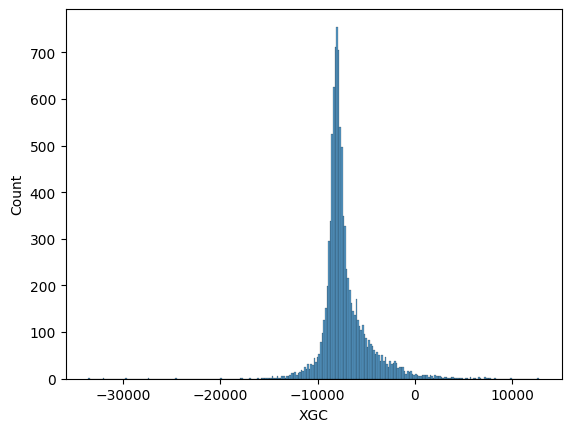

In [5]:
sns.histplot(data=small_df, x='XGC')
np.mean(small_df['XGC'])

<AxesSubplot: xlabel='YGC', ylabel='Count'>

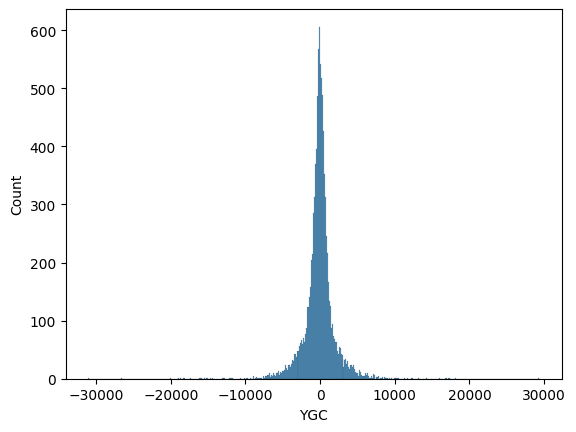

In [6]:
sns.histplot(data=small_df, x='YGC')

<AxesSubplot: xlabel='ZGC', ylabel='Count'>

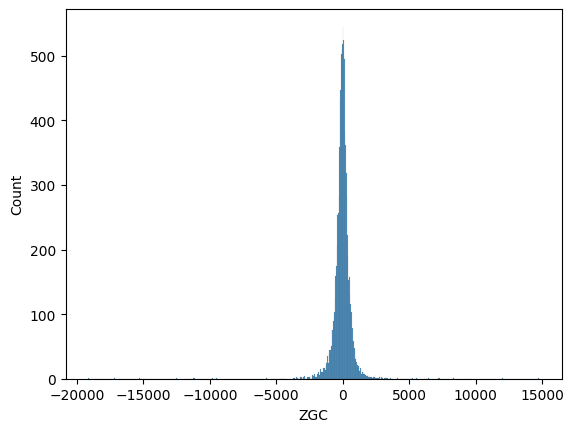

In [7]:
sns.histplot(data=small_df, x='ZGC')

<AxesSubplot: xlabel='Jphi', ylabel='Etot'>

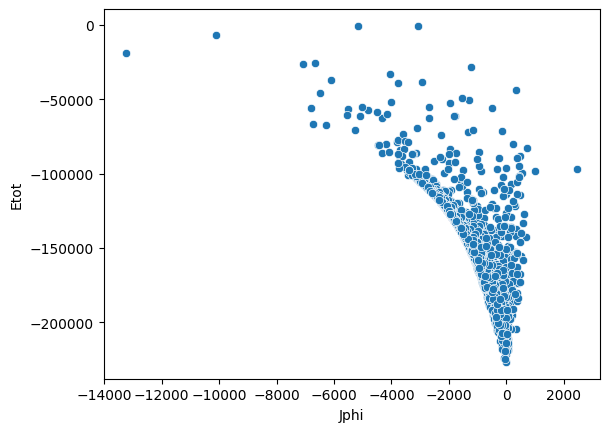

In [8]:
sns.scatterplot(data=small_df, x='Jphi', y='Etot')

<AxesSubplot: xlabel='Jz', ylabel='JR'>

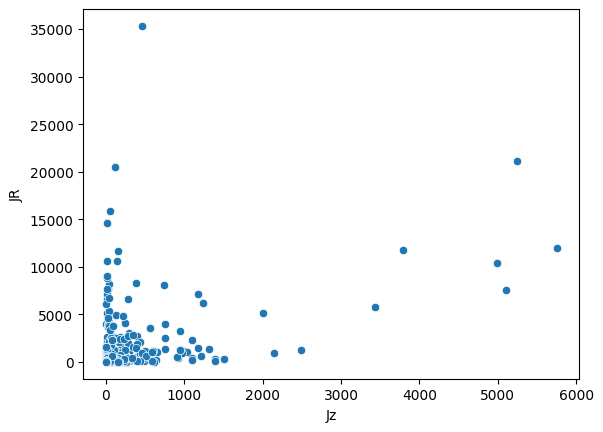

In [9]:
sns.scatterplot(data=small_df, x='Jz', y='JR')